In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set seaborn theme
#sns.set_theme(style='whitegrid')

In [48]:
df = pd.read_csv('ai_dev_productivity.csv')

In [49]:
df.shape

(500, 9)

In [50]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [51]:
df.sample(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
115,5.60,567,3,8.5,8,0,1.25,4.3,1
222,6.37,570,2,6.8,4,1,2.90,2.0,1
450,4.87,475,4,5.6,4,0,2.07,6.2,1
440,5.77,513,2,6.2,2,2,4.35,4.1,1
327,6.58,600,2,9.8,6,0,1.85,1.0,1


In [52]:
df.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [55]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [56]:
df['task_success'].value_counts()

task_success
1    303
0    197
Name: count, dtype: int64

In [57]:
corr  = df.corr()
corr

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
hours_coding,1.000000,0.889816,-0.009800,-0.025385,0.646830,0.055979,0.571882,0.050906,0.615528
coffee_intake_mg,0.889816,1.000000,-0.036370,-0.038990,0.561182,0.046261,0.465367,0.036878,0.695185
distractions,-0.009800,-0.036370,1.000000,0.041339,-0.042685,-0.008341,0.029137,0.400058,-0.104303
sleep_hours,-0.025385,-0.038990,0.041339,1.000000,-0.054519,-0.384424,-0.084018,-0.734054,0.186662
commits,0.646830,0.561182,-0.042685,-0.054519,1.000000,0.026312,0.369794,0.084575,0.338944
bugs_reported,0.055979,0.046261,-0.008341,-0.384424,0.026312,1.000000,0.113885,0.292640,-0.178226
ai_usage_hours,0.571882,0.465367,0.029137,-0.084018,0.369794,0.113885,1.000000,0.119910,0.241668
cognitive_load,0.050906,0.036878,0.400058,-0.734054,0.084575,0.292640,0.119910,1.000000,-0.199840
task_success,0.615528,0.695185,-0.104303,0.186662,0.338944,-0.178226,0.241668,-0.199840,1.000000


# Exploratory Data Analysis

### Countplot: Shows class Babalance

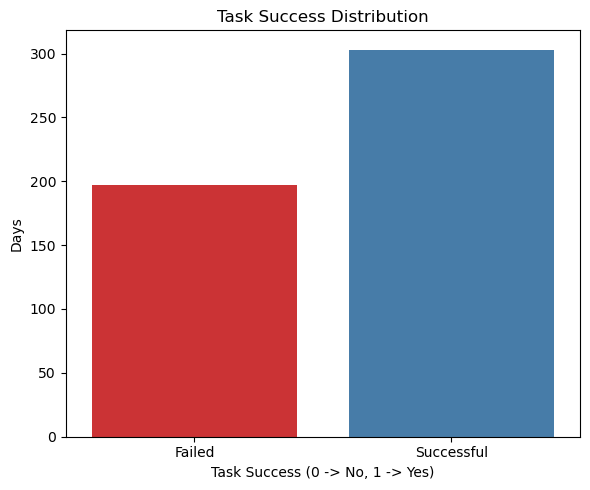

In [58]:
plt.figure(figsize=(6, 5))
sns.countplot(x='task_success', data=df, palette='Set1')
plt.title('Task Success Distribution')
plt.xlabel('Task Success (0 -> No, 1 -> Yes)')
plt.ylabel('Days')
plt.xticks([0, 1], ['Failed', 'Successful'])
plt.tight_layout()
plt.show()

## Kdeplot: Distribution of Features by Class

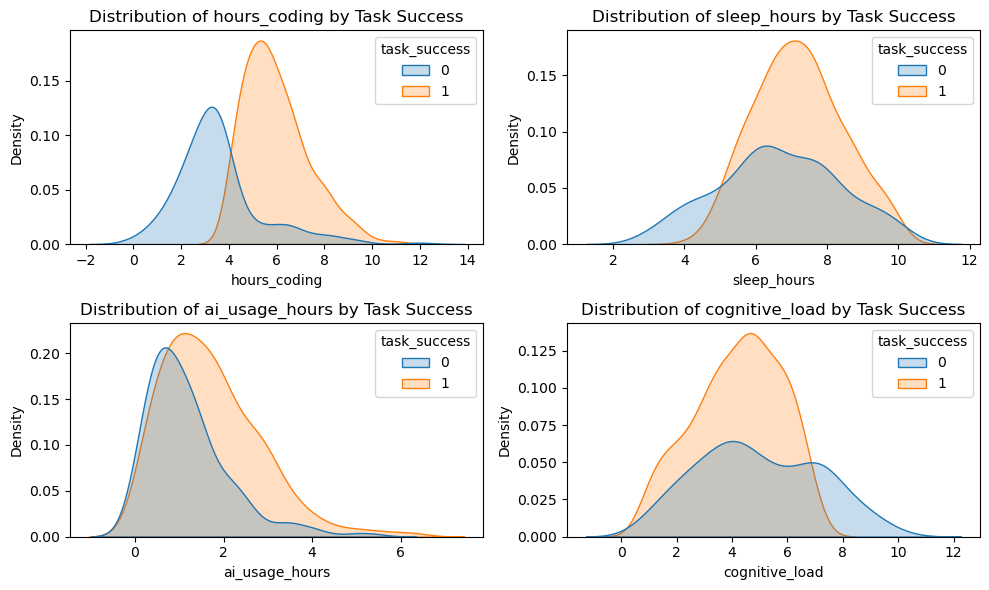

In [59]:
# Sample data for plotting

features = ['hours_coding', 'sleep_hours', 'ai_usage_hours', 'cognitive_load']
num_features = len(features)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows × 2 columns
axes = axes.flatten()  # Flatten to easily loop

for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, hue='task_success', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Task Success')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

## histograms: Distribution of Key Features

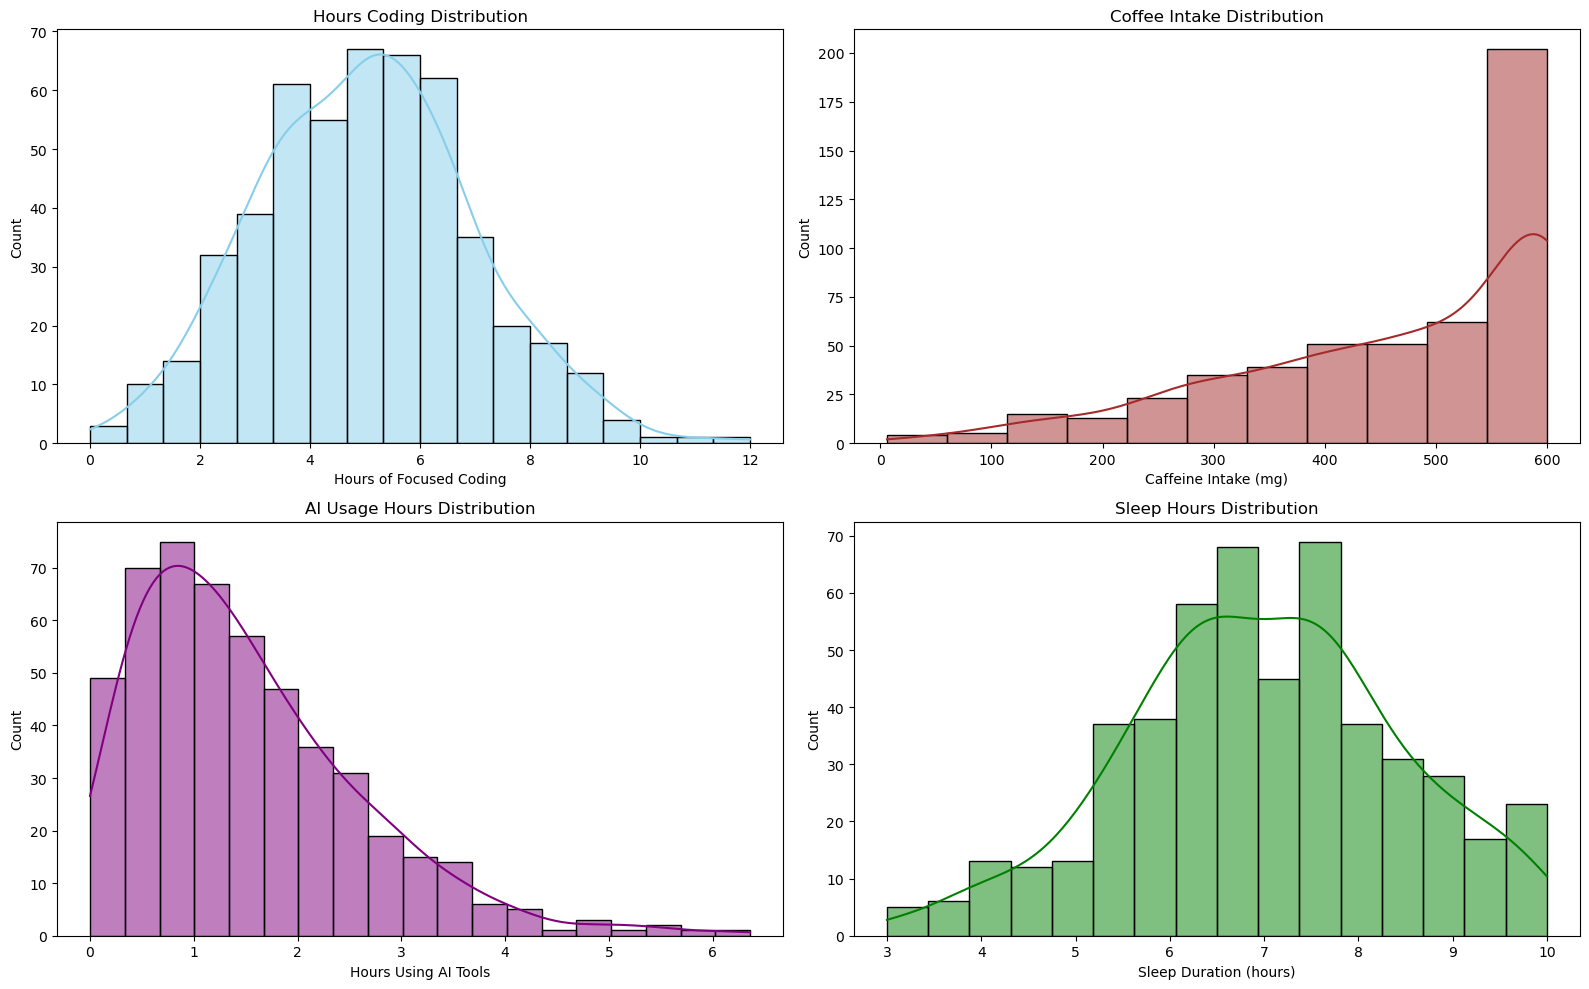

In [60]:
# This grid of histograms shows the distribution of productivity and physiological variables.
# It helps in understanding the range, skewness, and potential anomalies in each feature.

# Feature settings: (column name, color, title, xlabel)
feature_settings = [
    ('hours_coding', 'skyblue', 'Hours Coding Distribution', 'Hours of Focused Coding'),
    ('coffee_intake_mg', 'brown', 'Coffee Intake Distribution', 'Caffeine Intake (mg)'),
    ('ai_usage_hours', 'purple', 'AI Usage Hours Distribution', 'Hours Using AI Tools'),
    ('sleep_hours', 'green', 'Sleep Hours Distribution', 'Sleep Duration (hours)')
]

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten 2D axes array to 1D for easy indexing

# Loop through features
for i, (col, color, title, xlabel) in enumerate(feature_settings):
    sns.histplot(df[col], kde=True, ax=axes[i], color=color)
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)

plt.tight_layout()
plt.show()

## Boxplot : Feature Distribution by Task Success

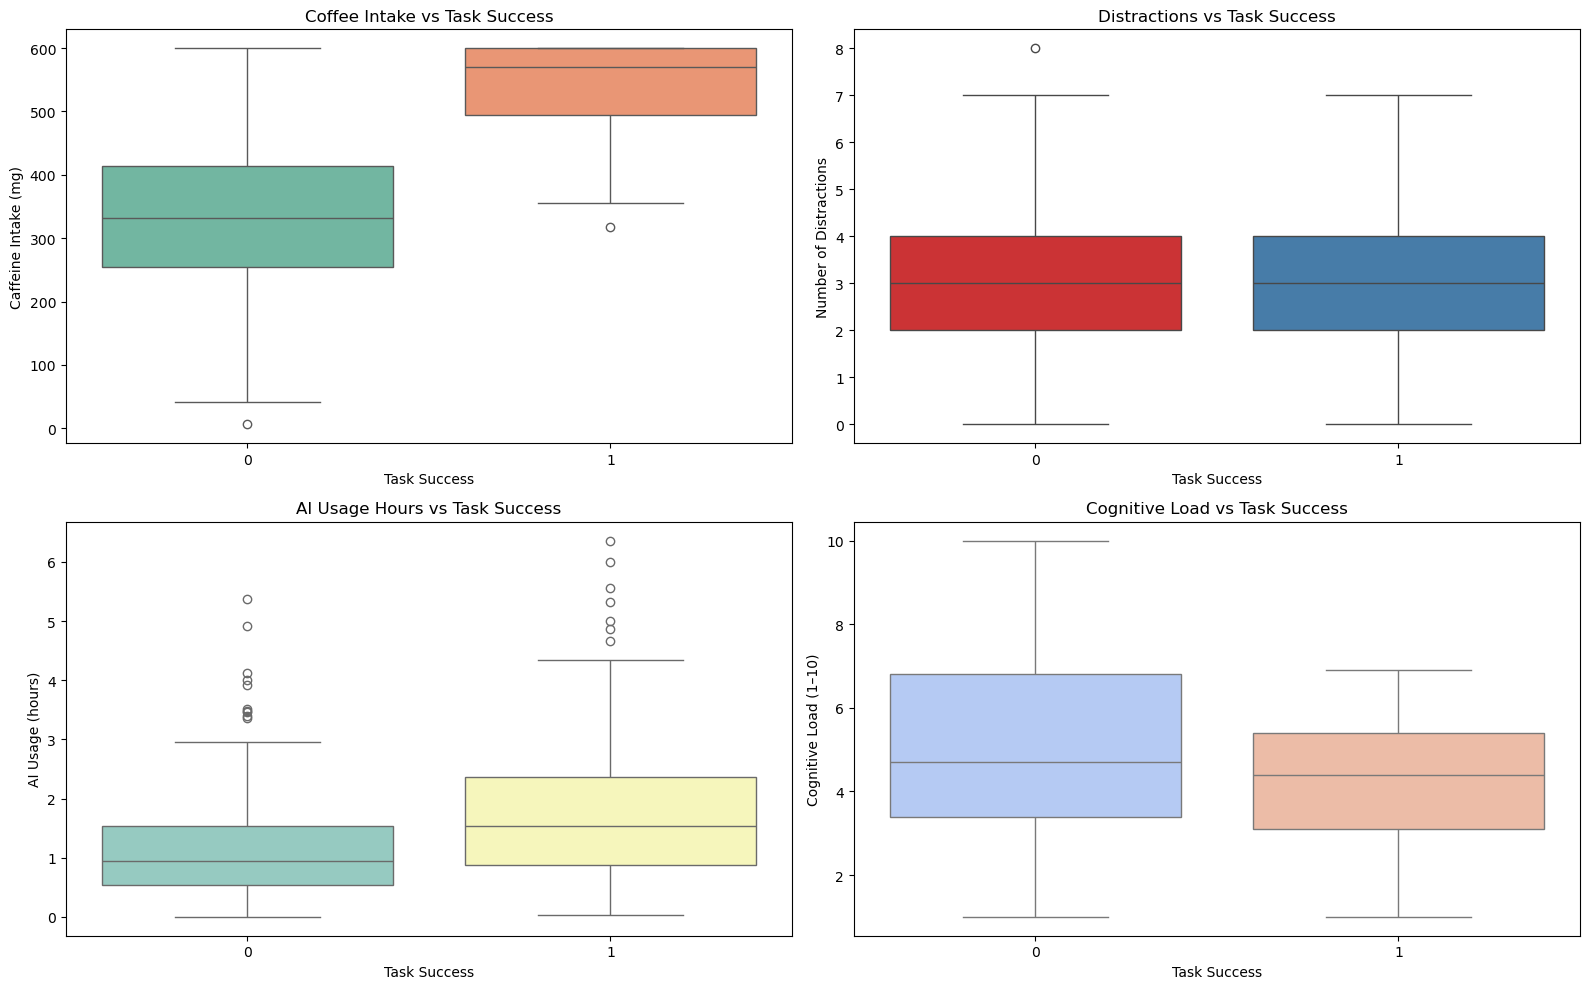

In [61]:
# These boxplots show how each feature varies with task success (0 = fail, 1 = success).
# Helps identify which variables have a strong relationship with productivity outcome.
import matplotlib.pyplot as plt
import seaborn as sns

# Settings: (y_variable, title, ylabel, color palette)
boxplot_features = [
    ('coffee_intake_mg', 'Coffee Intake vs Task Success', 'Caffeine Intake (mg)', 'Set2'),
    ('distractions', 'Distractions vs Task Success', 'Number of Distractions', 'Set1'),
    ('ai_usage_hours', 'AI Usage Hours vs Task Success', 'AI Usage (hours)', 'Set3'),
    ('cognitive_load', 'Cognitive Load vs Task Success', 'Cognitive Load (1–10)', 'coolwarm')
]

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Generate boxplots
for i, (feature, title, ylabel, palette) in enumerate(boxplot_features):
    sns.boxplot(x='task_success', y=feature, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(title)
    axes[i].set_xlabel('Task Success')
    axes[i].set_ylabel(ylabel)

plt.tight_layout()
plt.show()


## Heatmapt: Identify relationships between variables

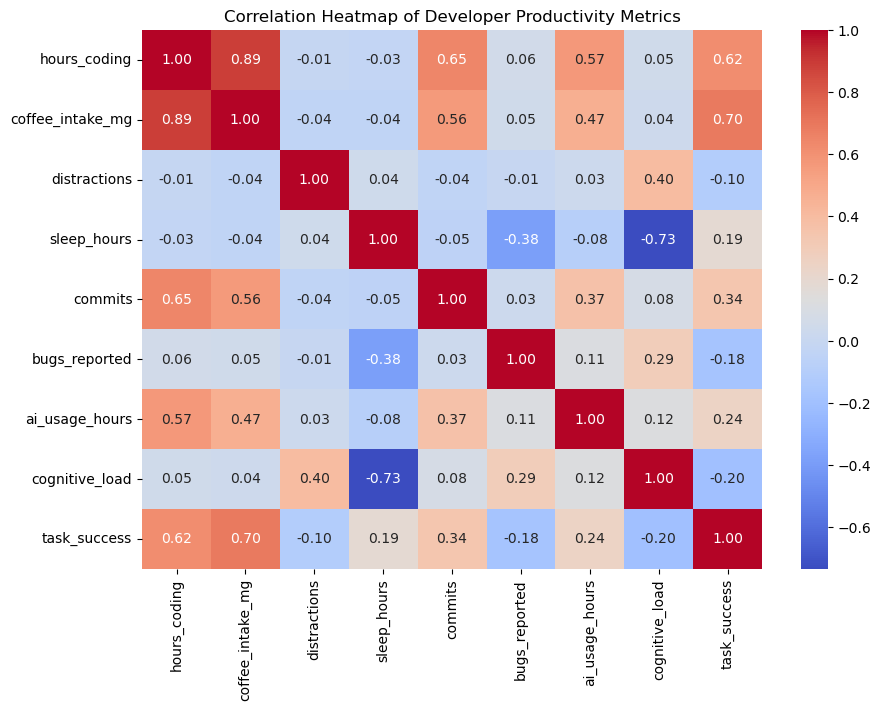

In [62]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Developer Productivity Metrics')
plt.show()

## Pairplot: Multivariate Relationship Exploration

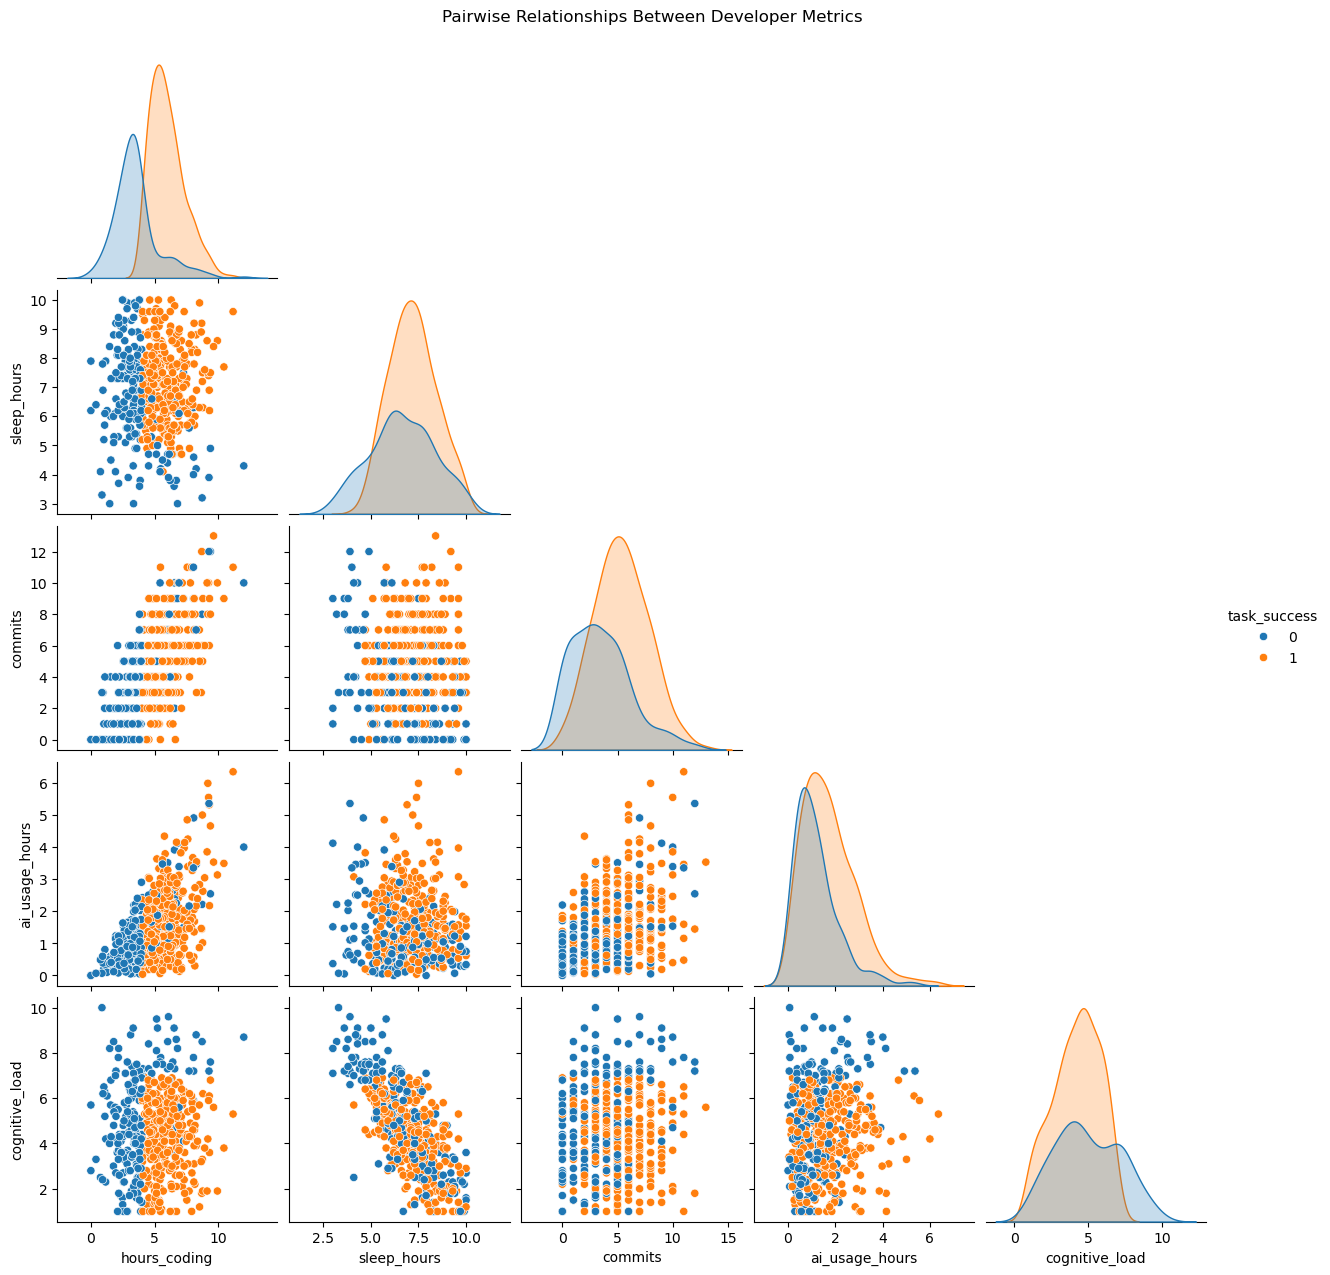

In [63]:
# This pairplot helps visualize pairwise relationships across selected features.
# Ideal for spotting clusters, correlations, and distributions simultaneously.

df_pairplot = df[['hours_coding', 'sleep_hours', 'commits', 'ai_usage_hours', 'cognitive_load', 'task_success']]
sns.pairplot(df_pairplot, hue='task_success', corner=True)
plt.suptitle('Pairwise Relationships Between Developer Metrics', y=1.02)
plt.show()

# Prediction Analyis with Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
# dataset columns
features = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
            'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']
target = 'task_success'


# Features (X) and Target (y)
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

## Model Evaluations

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.90      0.86      0.88        66

    accuracy                           0.85       100
   macro avg       0.83      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

Accuracy Score: 0.85


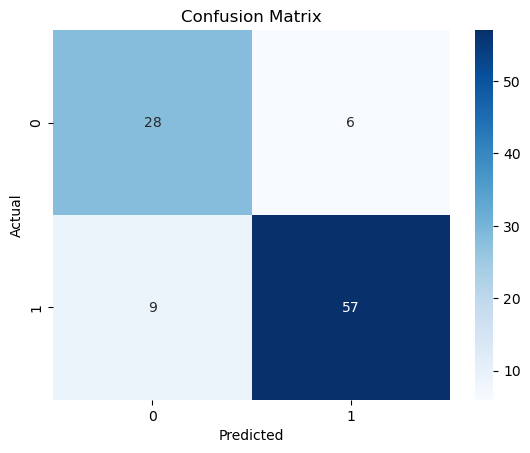

In [68]:
# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()